In [1]:
# Imports.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tfd = tf.contrib.distributions

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Model & Plotting.

neurons = 256

# Encoder.
def make_encoder(data, code_size):
    x = tf.layers.flatten(data)
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, code_size, tf.nn.tanh)
    scl = tf.layers.dense(h2, code_size, tf.nn.softplus)
    return tfd.MultivariateNormalDiag(loc, scl)

# Prior.
def make_prior(code_size):
    loc = tf.zeros(code_size)
    scl = tf.ones(code_size)
    return tfd.MultivariateNormalDiag(loc, scl)

# Decoder
def make_decoder(code, data_shape):
    x = code
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    scl = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    
    return loc, scl

# Optimisation
make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

In [3]:
# Dataset retrieval.
X_train = np.load('FireEvac_train_set.npy')
X_test = np.load('FireEvac_test_set.npy')

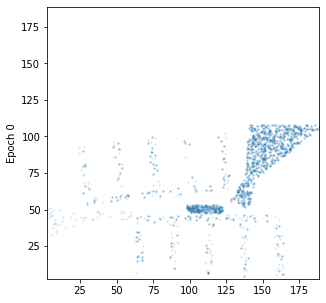

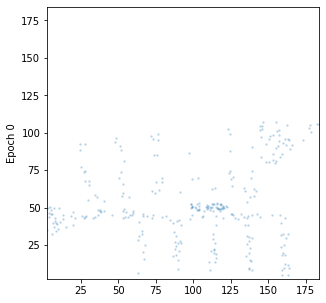

In [4]:
# Plotting.
def plot(epoch, codes, size=2):
    ig, ax = plt.subplots(ncols=1, figsize=(size, size))
    no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
    ax.set_ylabel('Epoch {}'.format(epoch))
    ax.scatter(codes[:, 0], codes[:, 1], s=2, alpha=0.1)
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)
    ax.tick_params(axis='both', which='both', **no_ticks)
    plt.show()
    
plot(0, X_train, size=5)
plot(0, X_test, size=5)

In [5]:
data = tf.placeholder(tf.float32, [None, 2])

cs = 500

# Define the model.
prior = make_prior(code_size=cs)
posterior = make_encoder(data, code_size=cs)
code = posterior.sample()

# Define the loss.
loc, scl = make_decoder(code, [2])

mvn = tfd.Independent(tfd.MultivariateNormalDiag(loc, scl))
likelihood = mvn.log_prob(data)

divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - .5*divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlo

Epoch 0 elbo -709190.1


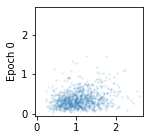

Reconstruction:


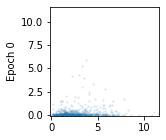

Epoch 1 elbo -15.13611


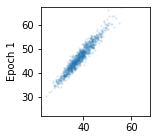

Reconstruction:


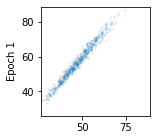

Epoch 2 elbo -11.661815


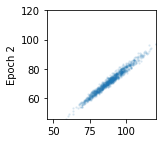

Reconstruction:


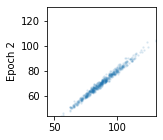

Epoch 3 elbo -11.144354


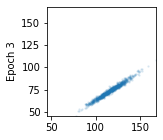

Reconstruction:


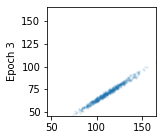

Epoch 4 elbo -11.076195


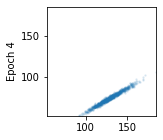

Reconstruction:


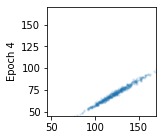

Epoch 5 elbo -10.935576


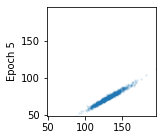

Reconstruction:


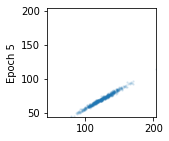

Epoch 6 elbo -11.099426


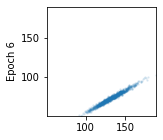

Reconstruction:


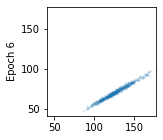

Epoch 7 elbo -11.546113


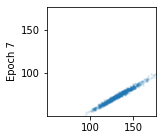

Reconstruction:


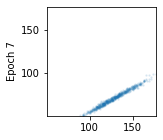

Epoch 8 elbo -11.069132


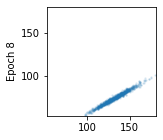

Reconstruction:


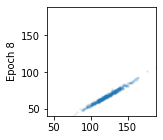

Epoch 9 elbo -11.016966


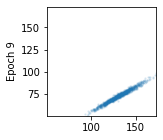

Reconstruction:


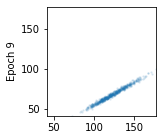

Epoch 10 elbo -10.9243965


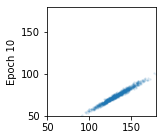

Reconstruction:


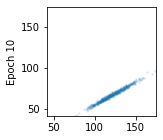

Epoch 11 elbo -11.084507


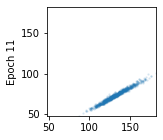

Reconstruction:


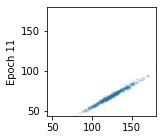

Epoch 12 elbo -10.917482


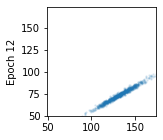

Reconstruction:


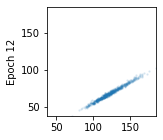

Epoch 13 elbo -11.051743


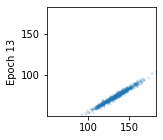

Reconstruction:


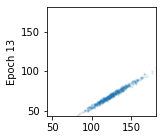

Epoch 14 elbo -11.180692


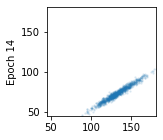

Reconstruction:


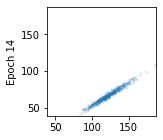

Epoch 15 elbo -10.908128


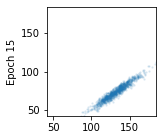

Reconstruction:


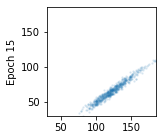

Epoch 16 elbo -10.940617


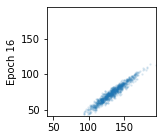

Reconstruction:


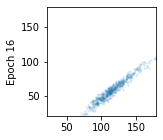

Epoch 17 elbo -10.629272


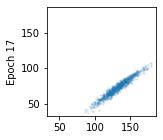

Reconstruction:


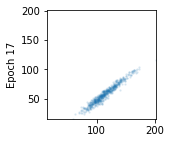

Epoch 18 elbo -10.687451


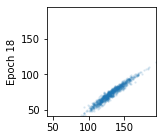

Reconstruction:


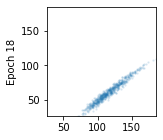

Epoch 19 elbo -10.814053


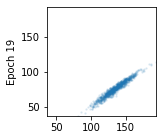

Reconstruction:


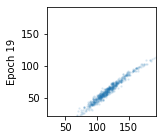

Epoch 20 elbo -10.7239895


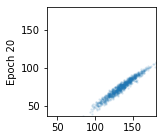

Reconstruction:


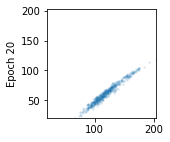

Epoch 21 elbo -10.768319


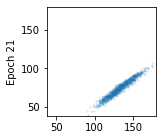

Reconstruction:


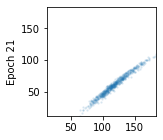

Epoch 22 elbo -10.738629


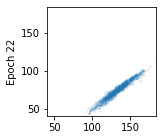

Reconstruction:


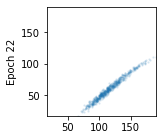

Epoch 23 elbo -10.768128


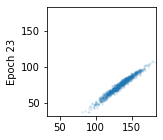

Reconstruction:


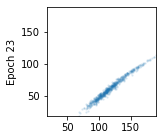

Epoch 24 elbo -10.854572


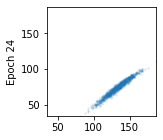

Reconstruction:


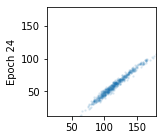

Epoch 25 elbo -10.901563


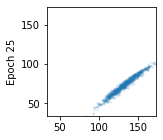

Reconstruction:


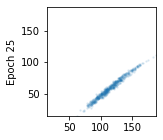

Epoch 26 elbo -10.84297


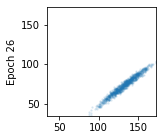

Reconstruction:


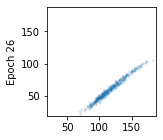

Epoch 27 elbo -10.6355505


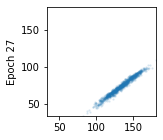

Reconstruction:


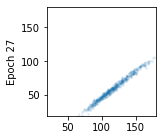

Epoch 28 elbo -10.676995


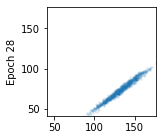

Reconstruction:


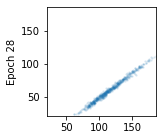

Epoch 29 elbo -10.620278


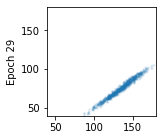

Reconstruction:


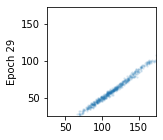

Epoch 30 elbo -10.623701


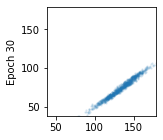

Reconstruction:


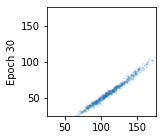

Epoch 31 elbo -10.662012


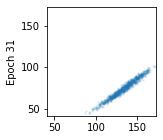

Reconstruction:


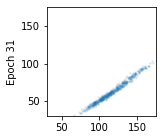

Epoch 32 elbo -10.555744


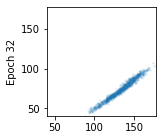

Reconstruction:


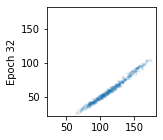

Epoch 33 elbo -10.604106


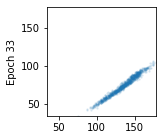

Reconstruction:


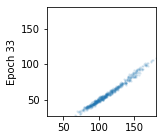

Epoch 34 elbo -10.644623


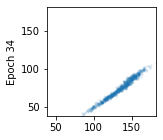

Reconstruction:


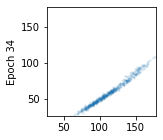

Epoch 35 elbo -10.528855


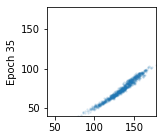

Reconstruction:


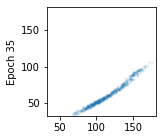

Epoch 36 elbo -10.512698


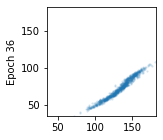

Reconstruction:


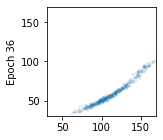

Epoch 37 elbo -10.290813


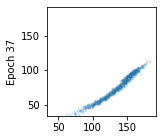

Reconstruction:


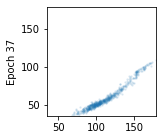

Epoch 38 elbo -10.167511


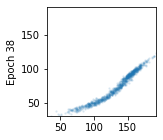

Reconstruction:


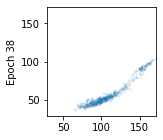

Epoch 39 elbo -10.253556


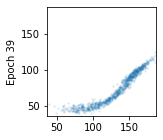

Reconstruction:


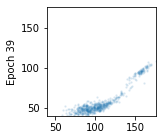

Epoch 40 elbo -10.168659


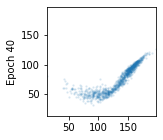

Reconstruction:


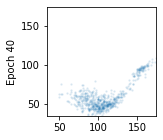

Epoch 41 elbo -10.225272


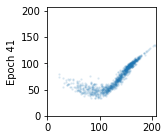

Reconstruction:


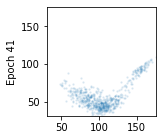

Epoch 42 elbo -9.950783


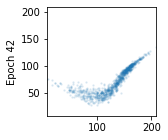

Reconstruction:


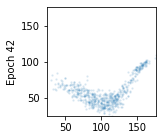

Epoch 43 elbo -9.956382


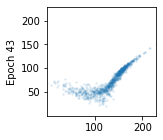

Reconstruction:


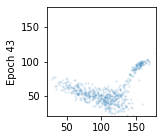

Epoch 44 elbo -9.973557


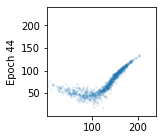

Reconstruction:


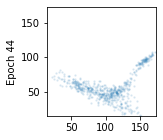

Epoch 45 elbo -9.805899


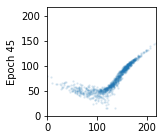

Reconstruction:


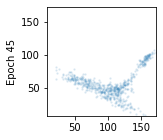

Epoch 46 elbo -9.994864


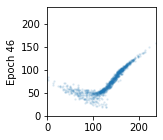

Reconstruction:


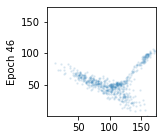

Epoch 47 elbo -9.739955


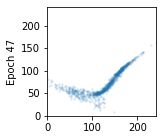

Reconstruction:


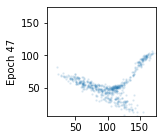

Epoch 48 elbo -9.809646


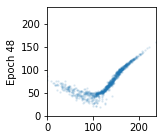

Reconstruction:


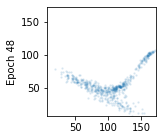

Epoch 49 elbo -9.740307


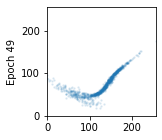

Reconstruction:


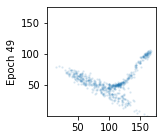

Epoch 50 elbo -9.780582


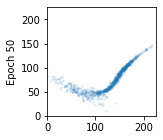

Reconstruction:


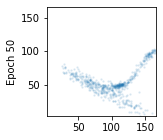

Epoch 51 elbo -9.861237


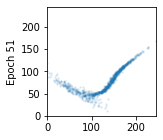

Reconstruction:


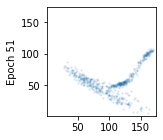

Epoch 52 elbo -9.7286215


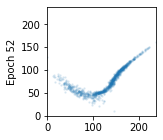

Reconstruction:


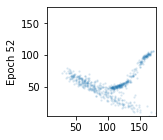

Epoch 53 elbo -9.6970625


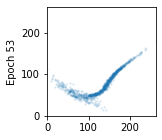

Reconstruction:


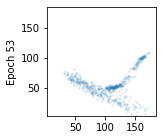

Epoch 54 elbo -9.709711


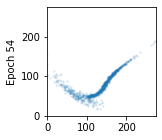

Reconstruction:


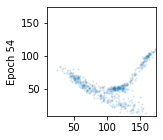

Epoch 55 elbo -9.695931


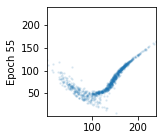

Reconstruction:


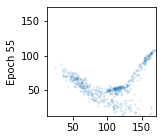

Epoch 56 elbo -9.618653


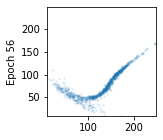

Reconstruction:


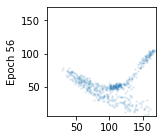

Epoch 57 elbo -9.605328


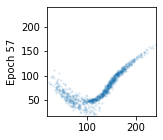

Reconstruction:


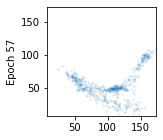

Epoch 58 elbo -9.701324


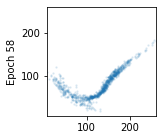

Reconstruction:


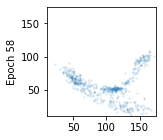

Epoch 59 elbo -9.64882


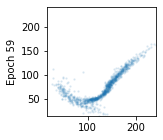

Reconstruction:


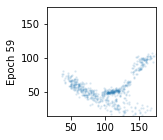

Epoch 60 elbo -9.583637


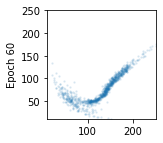

Reconstruction:


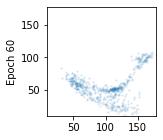

Epoch 61 elbo -9.544054


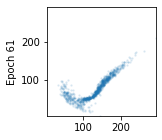

Reconstruction:


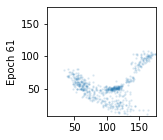

Epoch 62 elbo -9.614727


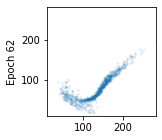

Reconstruction:


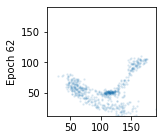

Epoch 63 elbo -9.569266


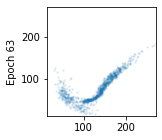

Reconstruction:


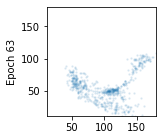

Epoch 64 elbo -9.753237


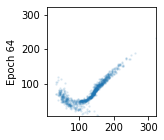

Reconstruction:


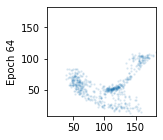

Epoch 65 elbo -9.627844


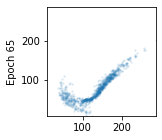

Reconstruction:


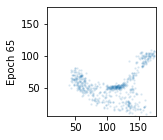

Epoch 66 elbo -9.48409


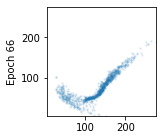

Reconstruction:


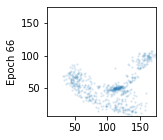

Epoch 67 elbo -9.798612


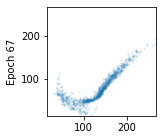

Reconstruction:


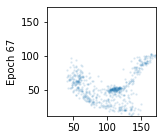

Epoch 68 elbo -9.48736


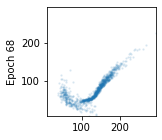

Reconstruction:


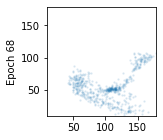

Epoch 69 elbo -9.529954


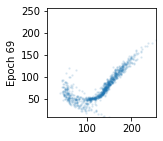

Reconstruction:


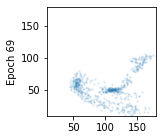

Epoch 70 elbo -9.499179


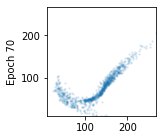

Reconstruction:


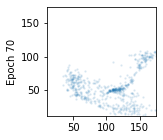

Epoch 71 elbo -9.517728


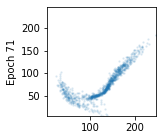

Reconstruction:


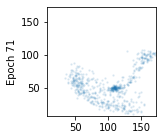

Epoch 72 elbo -9.5148945


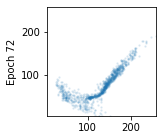

Reconstruction:


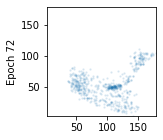

Epoch 73 elbo -9.516406


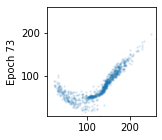

Reconstruction:


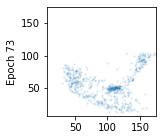

Epoch 74 elbo -9.406308


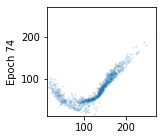

Reconstruction:


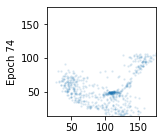

Epoch 75 elbo -9.517081


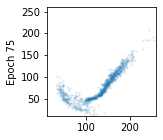

Reconstruction:


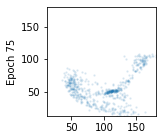

Epoch 76 elbo -9.600109


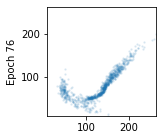

Reconstruction:


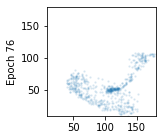

Epoch 77 elbo -9.608159


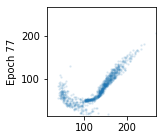

Reconstruction:


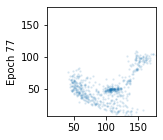

Epoch 78 elbo -9.47096


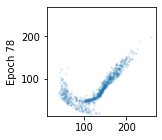

Reconstruction:


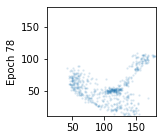

Epoch 79 elbo -9.513945


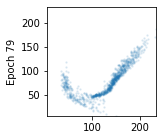

Reconstruction:


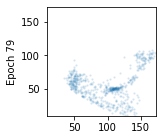

Epoch 80 elbo -9.526872


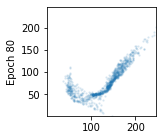

Reconstruction:


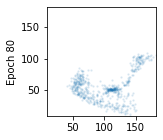

Epoch 81 elbo -9.36541


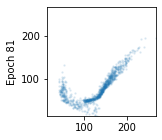

Reconstruction:


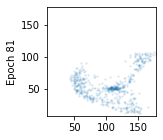

Epoch 82 elbo -9.335509


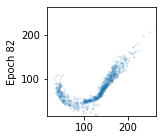

Reconstruction:


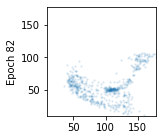

Epoch 83 elbo -9.428882


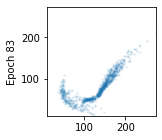

Reconstruction:


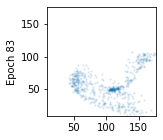

Epoch 84 elbo -9.525959


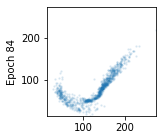

Reconstruction:


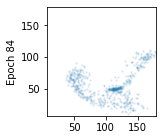

Epoch 85 elbo -9.3951645


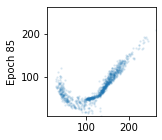

Reconstruction:


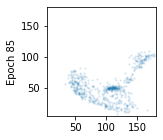

Epoch 86 elbo -9.384793


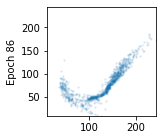

Reconstruction:


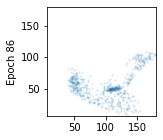

Epoch 87 elbo -9.446472


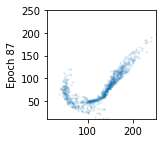

Reconstruction:


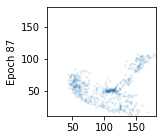

Epoch 88 elbo -9.463431


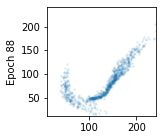

Reconstruction:


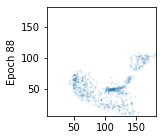

Epoch 89 elbo -9.402837


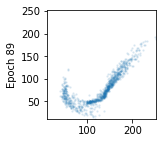

Reconstruction:


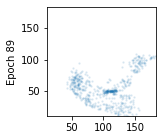

Epoch 90 elbo -9.430529


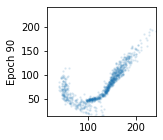

Reconstruction:


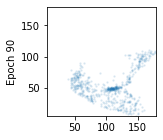

Epoch 91 elbo -9.512145


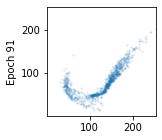

Reconstruction:


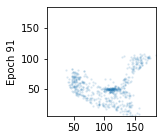

Epoch 92 elbo -9.380868


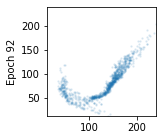

Reconstruction:


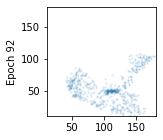

Epoch 93 elbo -9.409074


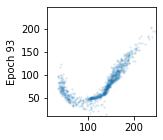

Reconstruction:


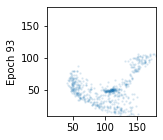

Epoch 94 elbo -9.365771


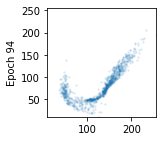

Reconstruction:


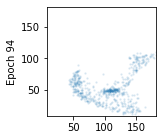

Epoch 95 elbo -9.432233


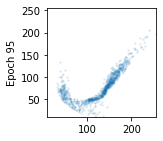

Reconstruction:


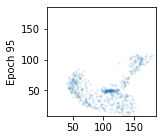

Epoch 96 elbo -9.397137


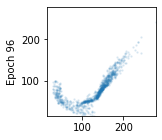

Reconstruction:


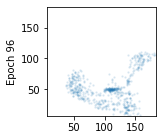

Epoch 97 elbo -9.378397


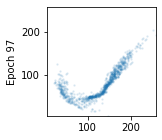

Reconstruction:


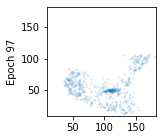

Epoch 98 elbo -9.38821


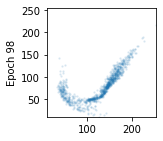

Reconstruction:


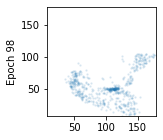

Epoch 99 elbo -9.164742


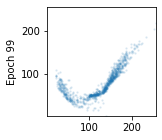

Reconstruction:


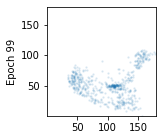

Epoch 100 elbo -9.2161


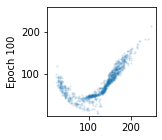

Reconstruction:


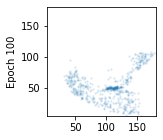

Epoch 101 elbo -9.282806


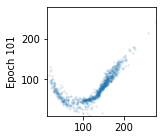

Reconstruction:


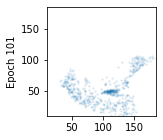

Epoch 102 elbo -9.3165865


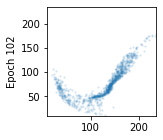

Reconstruction:


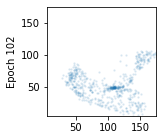

Epoch 103 elbo -9.399826


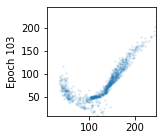

Reconstruction:


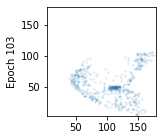

Epoch 104 elbo -9.336507


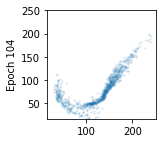

Reconstruction:


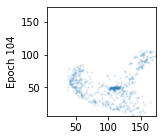

Epoch 105 elbo -9.363463


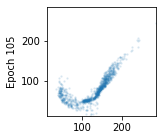

Reconstruction:


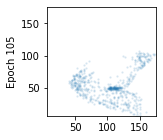

Epoch 106 elbo -9.403763


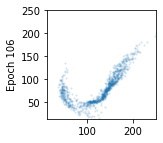

Reconstruction:


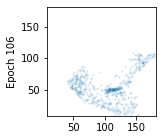

Epoch 107 elbo -9.368671


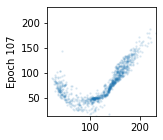

Reconstruction:


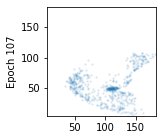

Epoch 108 elbo -9.470724


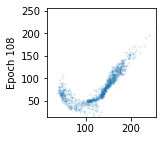

Reconstruction:


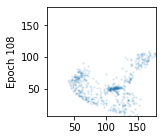

Epoch 109 elbo -9.406558


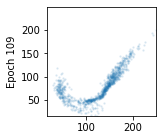

Reconstruction:


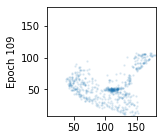

Epoch 110 elbo -9.168681


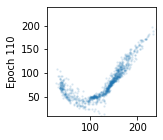

Reconstruction:


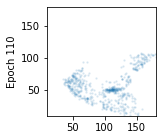

Epoch 111 elbo -9.435202


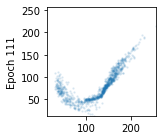

Reconstruction:


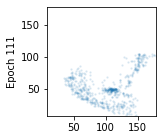

Epoch 112 elbo -9.120747


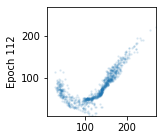

Reconstruction:


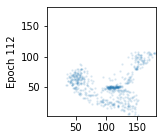

Epoch 113 elbo -9.224124


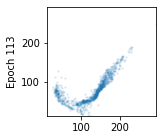

Reconstruction:


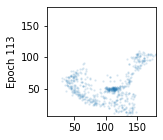

Epoch 114 elbo -9.209671


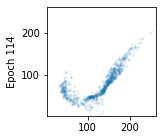

Reconstruction:


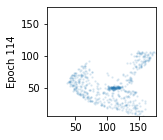

Epoch 115 elbo -9.228412


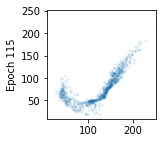

Reconstruction:


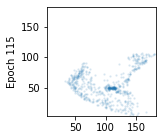

Epoch 116 elbo -9.217223


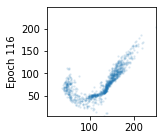

Reconstruction:


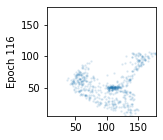

Epoch 117 elbo -9.251914


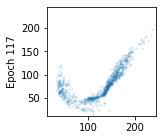

Reconstruction:


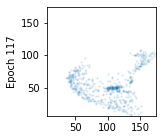

Epoch 118 elbo -9.2484665


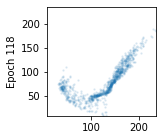

Reconstruction:


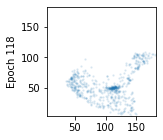

Epoch 119 elbo -9.285249


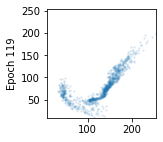

Reconstruction:


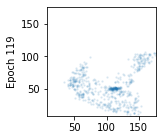

Epoch 120 elbo -9.306822


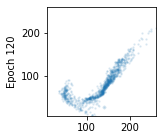

Reconstruction:


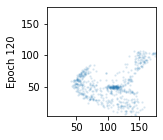

Epoch 121 elbo -9.182177


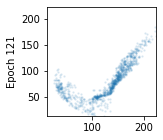

Reconstruction:


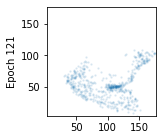

Epoch 122 elbo -9.304476


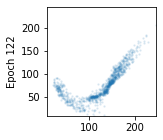

Reconstruction:


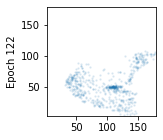

Epoch 123 elbo -9.317996


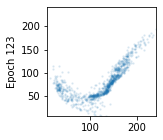

Reconstruction:


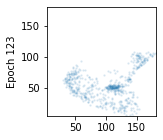

Epoch 124 elbo -9.1973


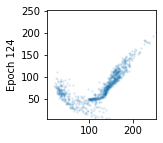

Reconstruction:


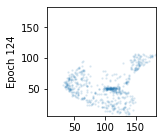

Epoch 125 elbo -9.177969


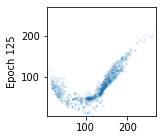

Reconstruction:


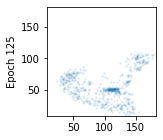

Epoch 126 elbo -9.395612


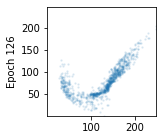

Reconstruction:


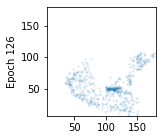

Epoch 127 elbo -9.290781


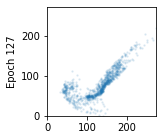

Reconstruction:


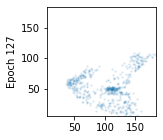

Epoch 128 elbo -9.205353


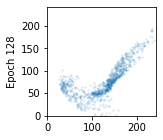

Reconstruction:


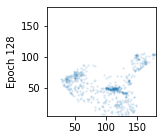

Epoch 129 elbo -9.000214


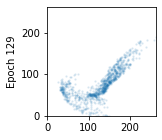

Reconstruction:


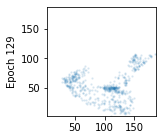

Epoch 130 elbo -9.177169


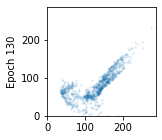

Reconstruction:


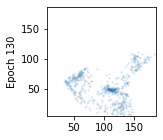

Epoch 131 elbo -8.996253


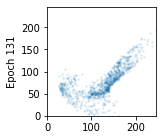

Reconstruction:


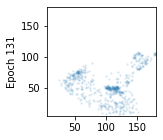

Epoch 132 elbo -9.025826


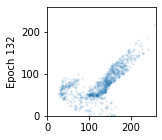

Reconstruction:


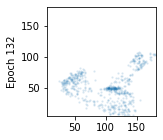

Epoch 133 elbo -9.008499


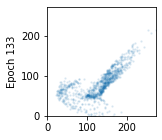

Reconstruction:


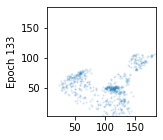

Epoch 134 elbo -8.9974985


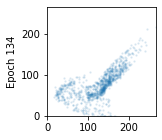

Reconstruction:


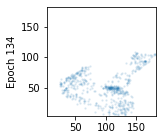

Epoch 135 elbo -8.953057


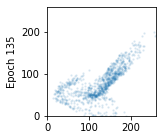

Reconstruction:


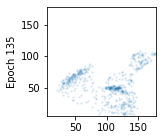

Epoch 136 elbo -9.154826


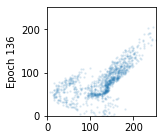

Reconstruction:


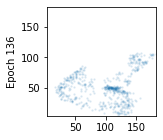

Epoch 137 elbo -8.8188505


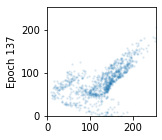

Reconstruction:


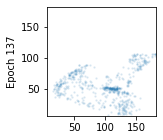

Epoch 138 elbo -8.93667


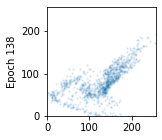

Reconstruction:


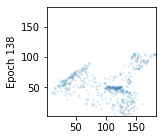

Epoch 139 elbo -8.773818


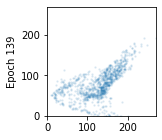

Reconstruction:


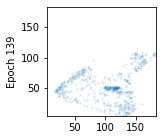

Epoch 140 elbo -8.615992


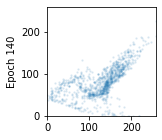

Reconstruction:


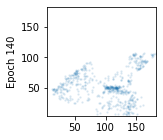

Epoch 141 elbo -8.687951


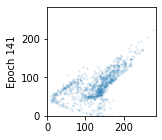

Reconstruction:


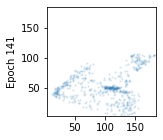

Epoch 142 elbo -8.652596


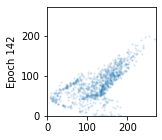

Reconstruction:


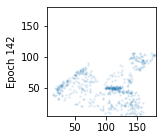

Epoch 143 elbo -8.59957


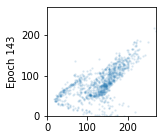

Reconstruction:


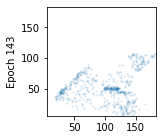

Epoch 144 elbo -8.677863


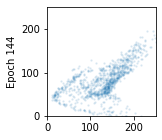

Reconstruction:


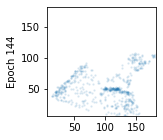

Epoch 145 elbo -8.638621


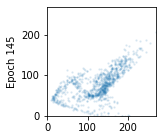

Reconstruction:


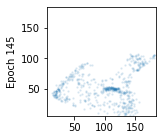

Epoch 146 elbo -8.988454


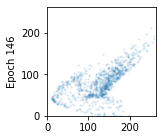

Reconstruction:


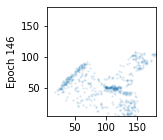

Epoch 147 elbo -8.478801


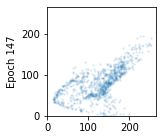

Reconstruction:


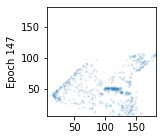

Epoch 148 elbo -8.532167


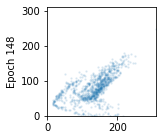

Reconstruction:


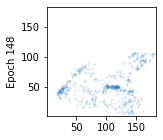

Epoch 149 elbo -8.338244


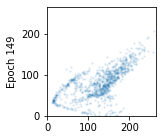

Reconstruction:


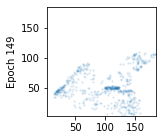

Epoch 150 elbo -8.460106


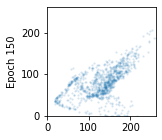

Reconstruction:


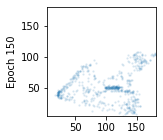

Epoch 151 elbo -8.495981


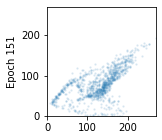

Reconstruction:


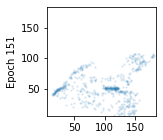

Epoch 152 elbo -8.566017


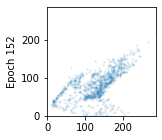

Reconstruction:


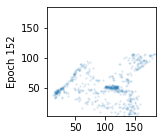

Epoch 153 elbo -8.408537


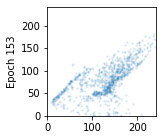

Reconstruction:


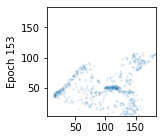

Epoch 154 elbo -8.399703


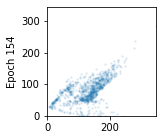

Reconstruction:


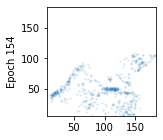

Epoch 155 elbo -8.402676


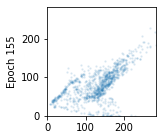

Reconstruction:


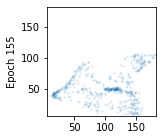

Epoch 156 elbo -8.634484


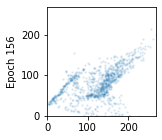

Reconstruction:


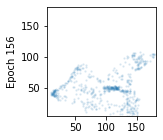

Epoch 157 elbo -8.436032


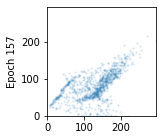

Reconstruction:


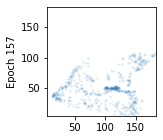

Epoch 158 elbo -8.409803


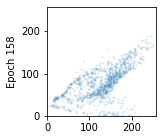

Reconstruction:


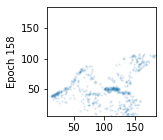

Epoch 159 elbo -8.478477


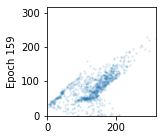

Reconstruction:


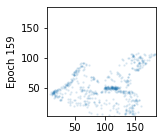

Epoch 160 elbo -8.25177


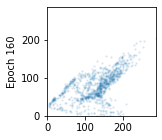

Reconstruction:


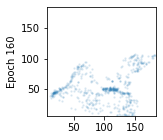

Epoch 161 elbo -8.300239


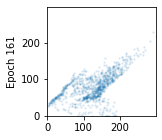

Reconstruction:


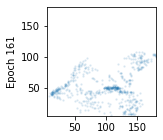

Epoch 162 elbo -8.582093


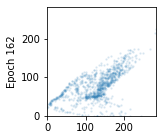

Reconstruction:


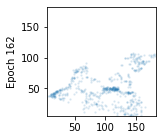

Epoch 163 elbo -8.225787


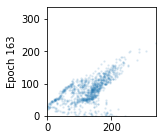

Reconstruction:


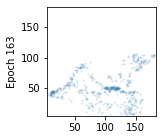

Epoch 164 elbo -8.234721


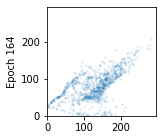

Reconstruction:


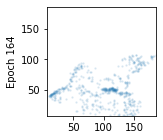

Epoch 165 elbo -8.349817


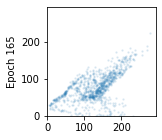

Reconstruction:


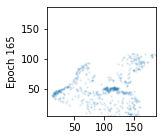

Epoch 166 elbo -8.336083


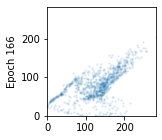

Reconstruction:


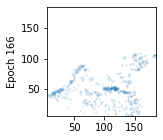

Epoch 167 elbo -8.224922


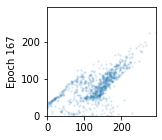

Reconstruction:


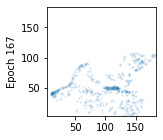

Epoch 168 elbo -8.227937


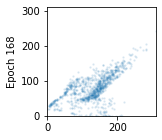

Reconstruction:


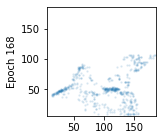

Epoch 169 elbo -8.190451


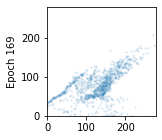

Reconstruction:


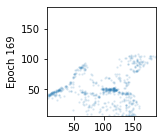

Epoch 170 elbo -8.302126


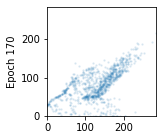

Reconstruction:


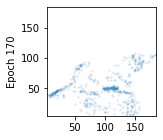

Epoch 171 elbo -8.315033


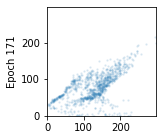

Reconstruction:


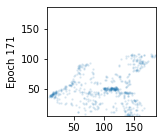

Epoch 172 elbo -8.204215


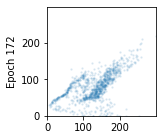

Reconstruction:


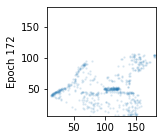

Epoch 173 elbo -8.371389


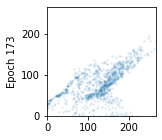

Reconstruction:


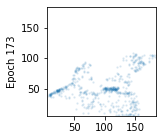

Epoch 174 elbo -8.289227


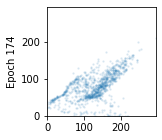

Reconstruction:


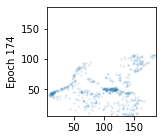

Epoch 175 elbo -8.283794


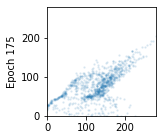

Reconstruction:


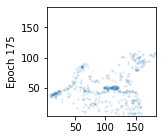

Epoch 176 elbo -8.282001


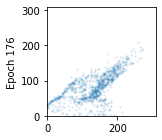

Reconstruction:


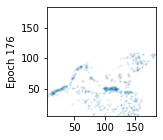

Epoch 177 elbo -8.350183


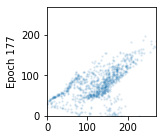

Reconstruction:


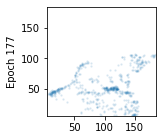

Epoch 178 elbo -8.609022


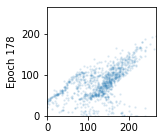

Reconstruction:


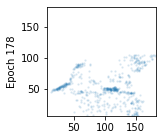

Epoch 179 elbo -8.30053


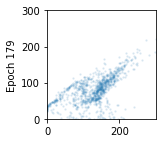

Reconstruction:


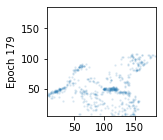

Epoch 180 elbo -8.172108


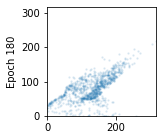

Reconstruction:


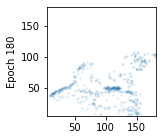

Epoch 181 elbo -8.153956


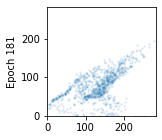

Reconstruction:


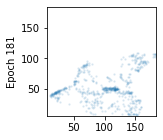

Epoch 182 elbo -8.13862


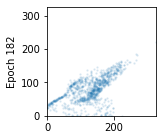

Reconstruction:


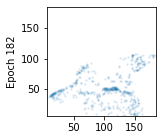

Epoch 183 elbo -8.1524515


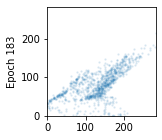

Reconstruction:


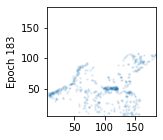

Epoch 184 elbo -8.192742


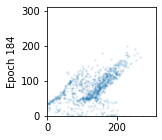

Reconstruction:


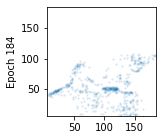

Epoch 185 elbo -8.011491


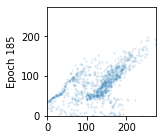

Reconstruction:


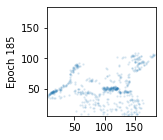

Epoch 186 elbo -8.266733


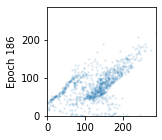

Reconstruction:


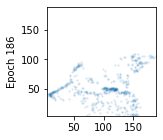

Epoch 187 elbo -7.983143


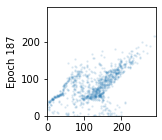

Reconstruction:


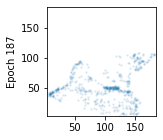

Epoch 188 elbo -8.221577


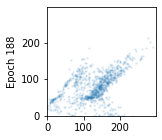

Reconstruction:


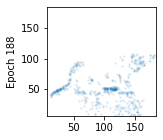

Epoch 189 elbo -8.034396


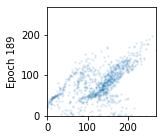

Reconstruction:


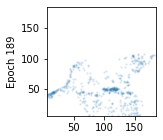

Epoch 190 elbo -8.028823


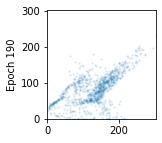

Reconstruction:


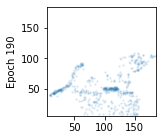

Epoch 191 elbo -8.052382


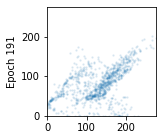

Reconstruction:


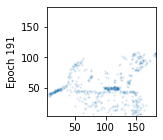

Epoch 192 elbo -7.942641


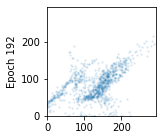

Reconstruction:


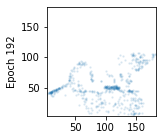

Epoch 193 elbo -8.068885


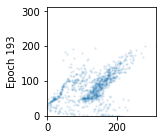

Reconstruction:


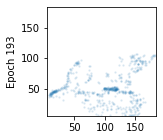

Epoch 194 elbo -8.100802


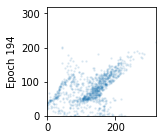

Reconstruction:


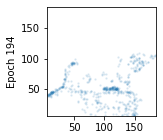

Epoch 195 elbo -7.9405336


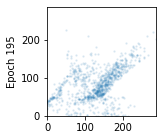

Reconstruction:


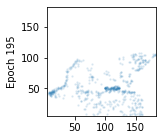

Epoch 196 elbo -8.091018


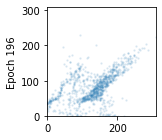

Reconstruction:


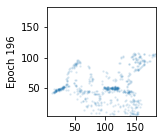

Epoch 197 elbo -7.937562


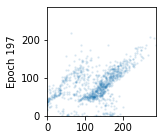

Reconstruction:


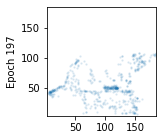

Epoch 198 elbo -8.050615


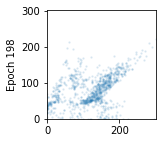

Reconstruction:


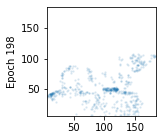

Epoch 199 elbo -7.9635677


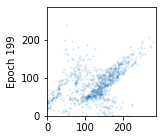

Reconstruction:


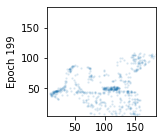

Epoch 200 elbo -8.166458


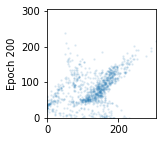

Reconstruction:


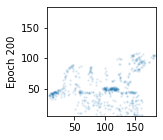

Epoch 201 elbo -8.178776


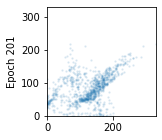

Reconstruction:


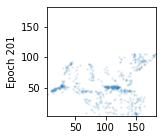

Epoch 202 elbo -8.002869


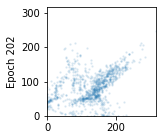

Reconstruction:


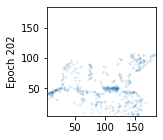

Epoch 203 elbo -8.027948


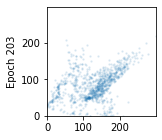

Reconstruction:


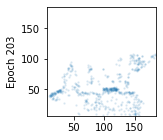

Epoch 204 elbo -7.9505534


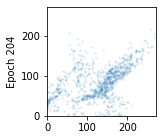

Reconstruction:


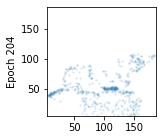

Epoch 205 elbo -8.127052


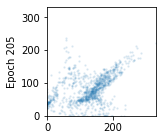

Reconstruction:


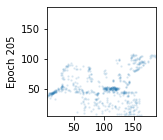

Epoch 206 elbo -8.332644


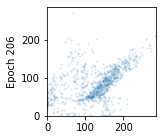

Reconstruction:


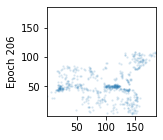

Epoch 207 elbo -8.087462


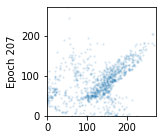

Reconstruction:


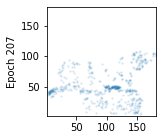

Epoch 208 elbo -7.8922935


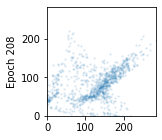

Reconstruction:


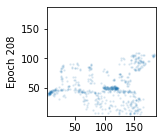

Epoch 209 elbo -8.051358


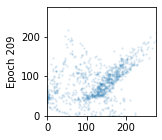

Reconstruction:


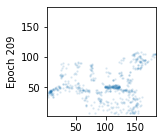

Epoch 210 elbo -7.829152


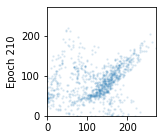

Reconstruction:


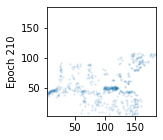

Epoch 211 elbo -7.775228


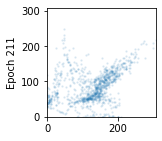

Reconstruction:


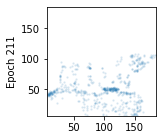

Epoch 212 elbo -7.8324804


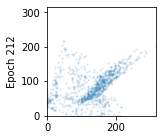

Reconstruction:


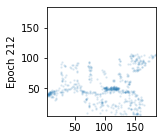

Epoch 213 elbo -7.823987


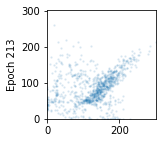

Reconstruction:


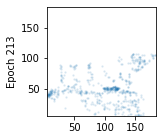

Epoch 214 elbo -7.9171615


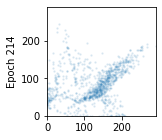

Reconstruction:


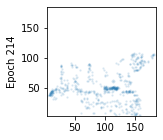

Epoch 215 elbo -7.9678874


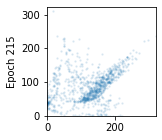

Reconstruction:


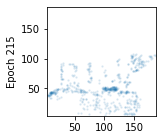

Epoch 216 elbo -7.9081674


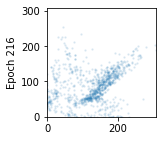

Reconstruction:


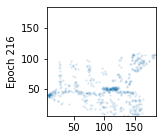

Epoch 217 elbo -7.9601116


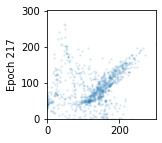

Reconstruction:


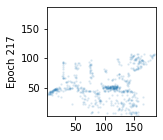

Epoch 218 elbo -7.7551856


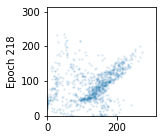

Reconstruction:


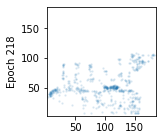

Epoch 219 elbo -7.7104673


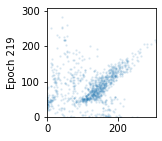

Reconstruction:


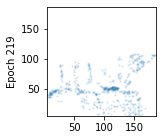

Epoch 220 elbo -8.018143


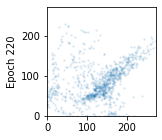

Reconstruction:


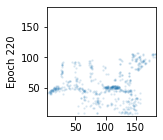

Epoch 221 elbo -7.760619


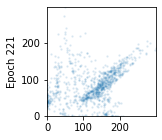

Reconstruction:


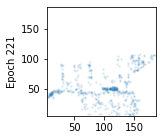

Epoch 222 elbo -7.815962


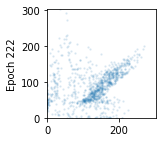

Reconstruction:


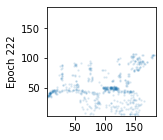

Epoch 223 elbo -7.844611


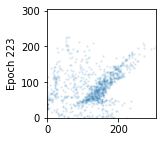

Reconstruction:


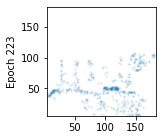

Epoch 224 elbo -7.7907877


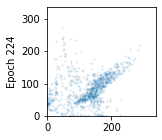

Reconstruction:


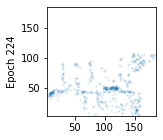

Epoch 225 elbo -7.812827


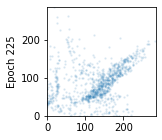

Reconstruction:


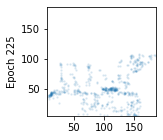

Epoch 226 elbo -7.7974625


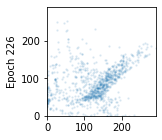

Reconstruction:


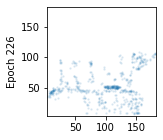

Epoch 227 elbo -7.829087


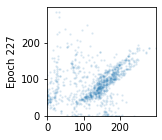

Reconstruction:


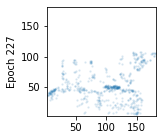

Epoch 228 elbo -7.81327


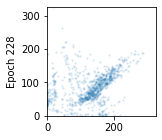

Reconstruction:


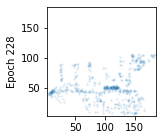

Epoch 229 elbo -7.7682633


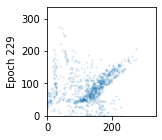

Reconstruction:


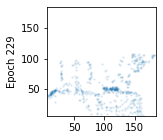

Epoch 230 elbo -7.7118554


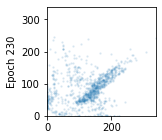

Reconstruction:


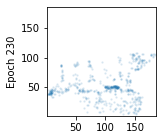

Epoch 231 elbo -7.8865886


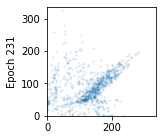

Reconstruction:


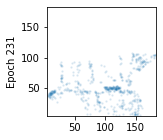

Epoch 232 elbo -7.7908244


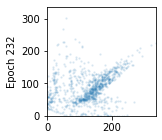

Reconstruction:


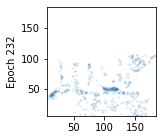

Epoch 233 elbo -7.6350775


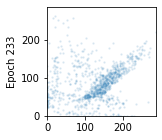

Reconstruction:


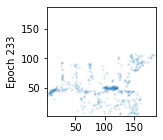

Epoch 234 elbo -7.8826237


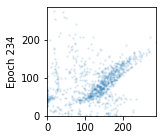

Reconstruction:


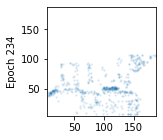

Epoch 235 elbo -7.667635


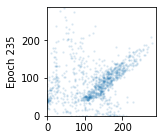

Reconstruction:


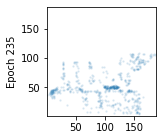

Epoch 236 elbo -7.745746


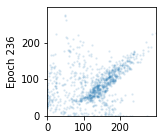

Reconstruction:


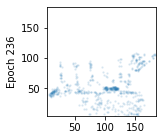

Epoch 237 elbo -7.758864


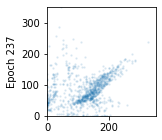

Reconstruction:


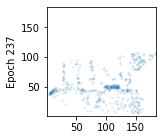

Epoch 238 elbo -7.7630143


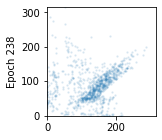

Reconstruction:


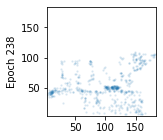

Epoch 239 elbo -7.9147844


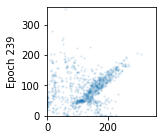

Reconstruction:


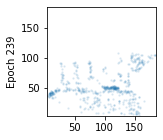

Epoch 240 elbo -7.6245995


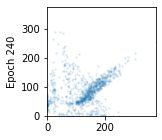

Reconstruction:


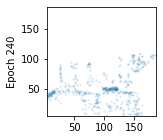

Epoch 241 elbo -7.9620476


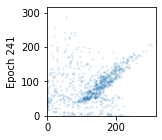

Reconstruction:


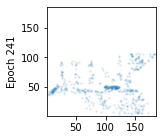

Epoch 242 elbo -7.6570783


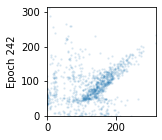

Reconstruction:


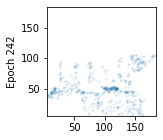

Epoch 243 elbo -7.7276073


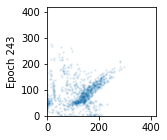

Reconstruction:


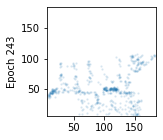

Epoch 244 elbo -7.628972


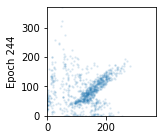

Reconstruction:


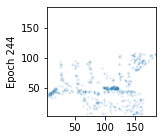

Epoch 245 elbo -7.649878


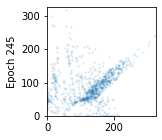

Reconstruction:


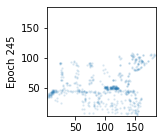

Epoch 246 elbo -7.5946665


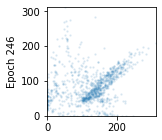

Reconstruction:


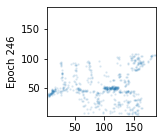

Epoch 247 elbo -7.725743


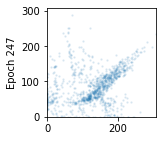

Reconstruction:


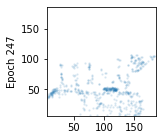

Epoch 248 elbo -7.6508694


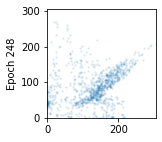

Reconstruction:


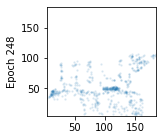

Epoch 249 elbo -7.7652187


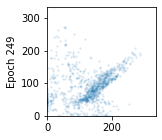

Reconstruction:


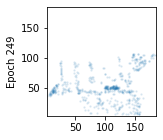

Epoch 250 elbo -7.6601334


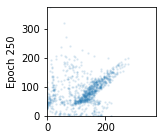

Reconstruction:


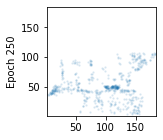

Epoch 251 elbo -7.619078


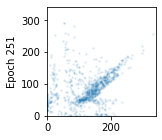

Reconstruction:


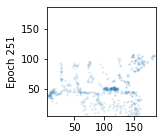

Epoch 252 elbo -7.7030306


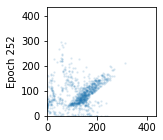

Reconstruction:


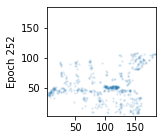

Epoch 253 elbo -7.722063


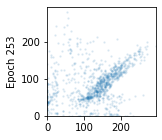

Reconstruction:


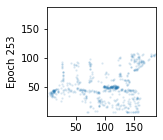

Epoch 254 elbo -7.6450105


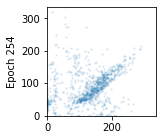

Reconstruction:


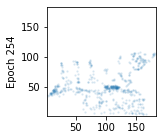

Epoch 255 elbo -7.700922


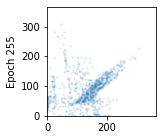

Reconstruction:


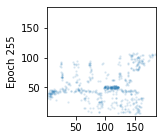

Epoch 256 elbo -7.581006


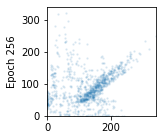

Reconstruction:


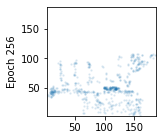

Epoch 257 elbo -7.7267666


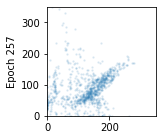

Reconstruction:


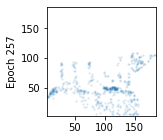

Epoch 258 elbo -7.7188454


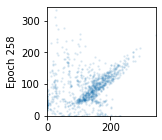

Reconstruction:


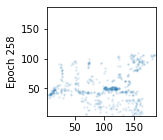

Epoch 259 elbo -7.563099


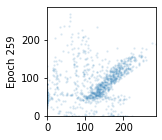

Reconstruction:


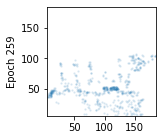

Epoch 260 elbo -7.6643076


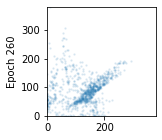

Reconstruction:


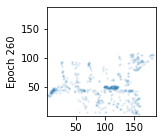

Epoch 261 elbo -7.6374993


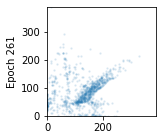

Reconstruction:


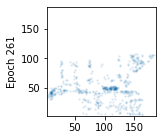

Epoch 262 elbo -7.601375


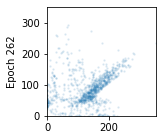

Reconstruction:


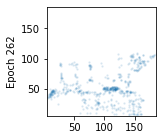

Epoch 263 elbo -7.4747133


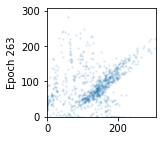

Reconstruction:


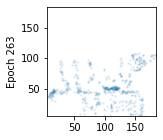

Epoch 264 elbo -7.645508


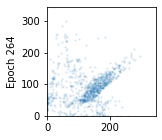

Reconstruction:


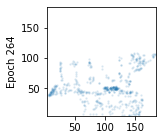

Epoch 265 elbo -7.838666


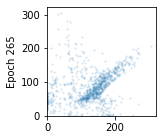

Reconstruction:


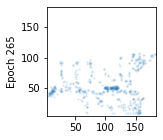

Epoch 266 elbo -7.5832624


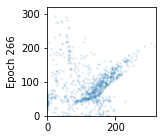

Reconstruction:


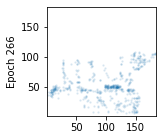

Epoch 267 elbo -7.82492


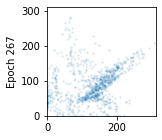

Reconstruction:


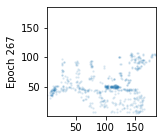

Epoch 268 elbo -7.568211


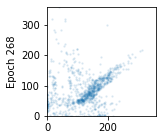

Reconstruction:


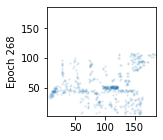

Epoch 269 elbo -7.6300178


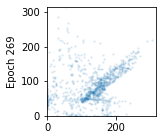

Reconstruction:


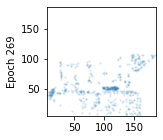

Epoch 270 elbo -7.5687704


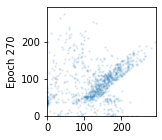

Reconstruction:


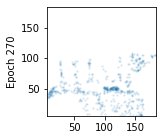

Epoch 271 elbo -7.6149936


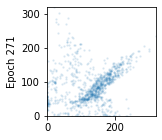

Reconstruction:


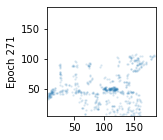

Epoch 272 elbo -7.5836473


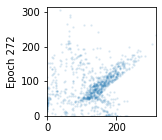

Reconstruction:


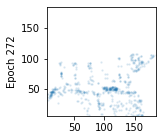

Epoch 273 elbo -7.641045


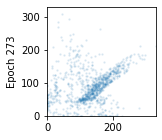

Reconstruction:


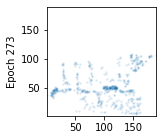

Epoch 274 elbo -7.5188923


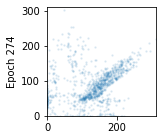

Reconstruction:


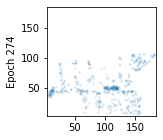

Epoch 275 elbo -7.658418


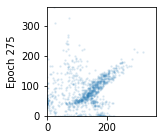

Reconstruction:


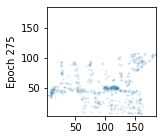

Epoch 276 elbo -7.6258836


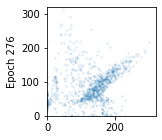

Reconstruction:


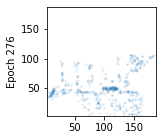

Epoch 277 elbo -7.4452457


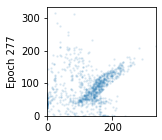

Reconstruction:


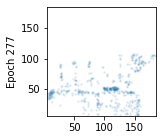

Epoch 278 elbo -8.960555


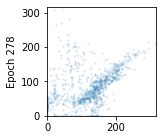

Reconstruction:


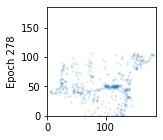

Epoch 279 elbo -7.953746


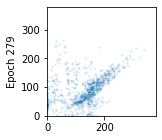

Reconstruction:


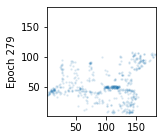

Epoch 280 elbo -7.8501906


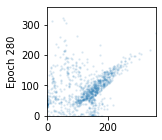

Reconstruction:


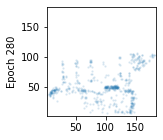

Epoch 281 elbo -7.7714753


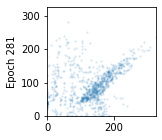

Reconstruction:


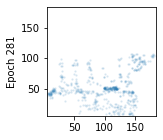

Epoch 282 elbo -7.7661395


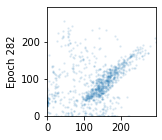

Reconstruction:


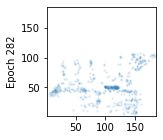

Epoch 283 elbo -7.6958075


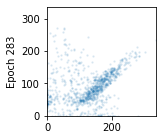

Reconstruction:


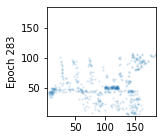

Epoch 284 elbo -7.665662


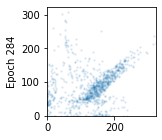

Reconstruction:


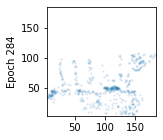

Epoch 285 elbo -7.6460514


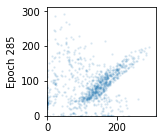

Reconstruction:


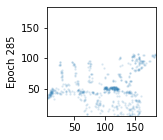

Epoch 286 elbo -7.6245437


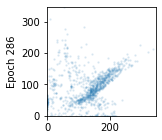

Reconstruction:


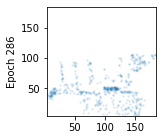

Epoch 287 elbo -7.817256


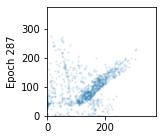

Reconstruction:


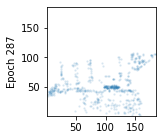

Epoch 288 elbo -7.921122


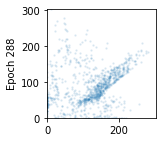

Reconstruction:


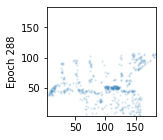

Epoch 289 elbo -7.8237348


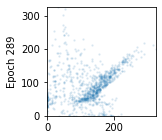

Reconstruction:


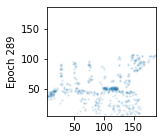

Epoch 290 elbo -7.656325


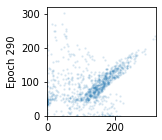

Reconstruction:


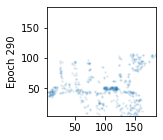

Epoch 291 elbo -7.57435


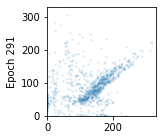

Reconstruction:


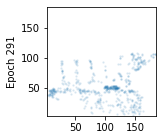

Epoch 292 elbo -7.6413565


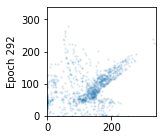

Reconstruction:


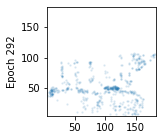

Epoch 293 elbo -7.6104555


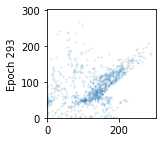

Reconstruction:


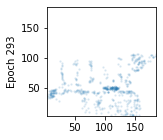

Epoch 294 elbo -7.4641643


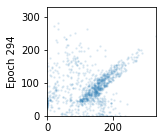

Reconstruction:


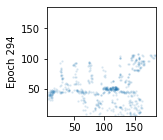

Epoch 295 elbo -7.5411572


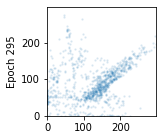

Reconstruction:


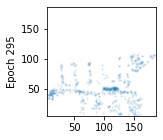

Epoch 296 elbo -7.6962547


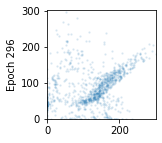

Reconstruction:


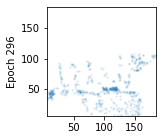

Epoch 297 elbo -7.6853385


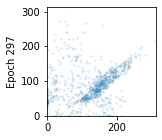

Reconstruction:


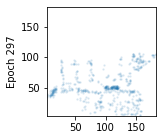

Epoch 298 elbo -7.5484595


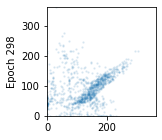

Reconstruction:


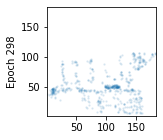

Epoch 299 elbo -7.7086506


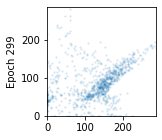

Reconstruction:


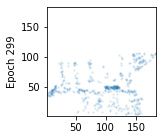

Epoch 300 elbo -7.7539306


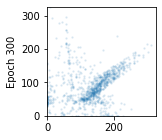

Reconstruction:


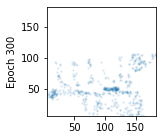

Epoch 301 elbo -7.480739


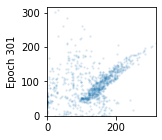

Reconstruction:


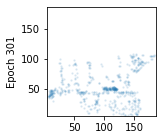

Epoch 302 elbo -7.7170167


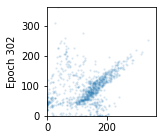

Reconstruction:


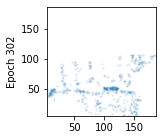

Epoch 303 elbo -7.544515


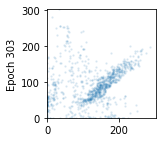

Reconstruction:


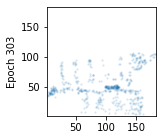

Epoch 304 elbo -7.622093


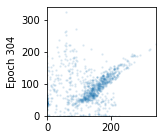

Reconstruction:


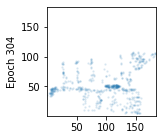

Epoch 305 elbo -7.471964


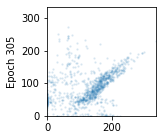

Reconstruction:


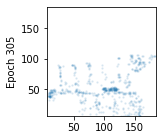

Epoch 306 elbo -8.119426


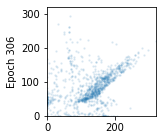

Reconstruction:


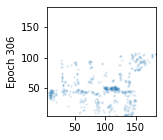

Epoch 307 elbo -7.5248814


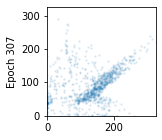

Reconstruction:


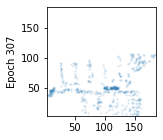

Epoch 308 elbo -7.5143833


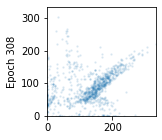

Reconstruction:


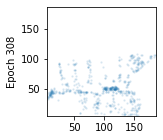

Epoch 309 elbo -7.5062833


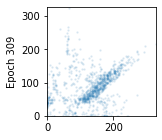

Reconstruction:


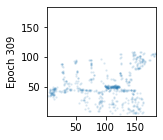

Epoch 310 elbo -7.593158


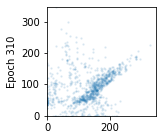

Reconstruction:


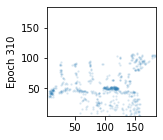

Epoch 311 elbo -7.7850943


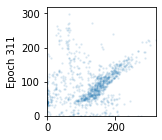

Reconstruction:


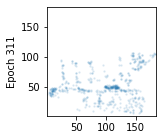

Epoch 312 elbo -7.4936767


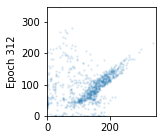

Reconstruction:


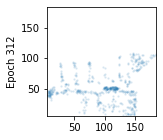

Epoch 313 elbo -7.5702977


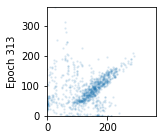

Reconstruction:


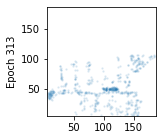

Epoch 314 elbo -7.5240746


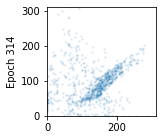

Reconstruction:


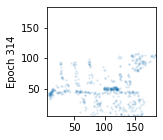

Epoch 315 elbo -7.4966063


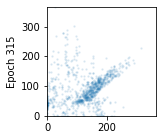

Reconstruction:


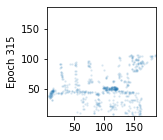

Epoch 316 elbo -7.529376


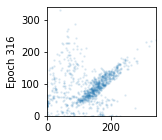

Reconstruction:


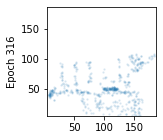

Epoch 317 elbo -7.63673


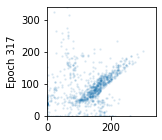

Reconstruction:


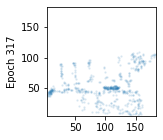

Epoch 318 elbo -7.498761


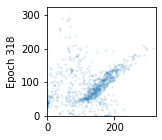

Reconstruction:


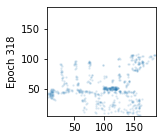

Epoch 319 elbo -8.642127


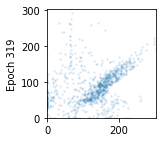

Reconstruction:


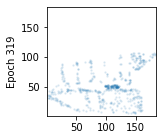

Epoch 320 elbo -7.610314


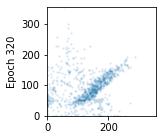

Reconstruction:


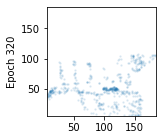

Epoch 321 elbo -7.532988


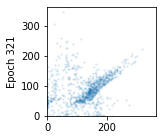

Reconstruction:


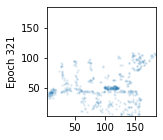

Epoch 322 elbo -7.4510937


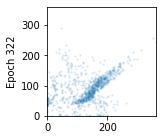

Reconstruction:


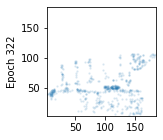

Epoch 323 elbo -7.4527326


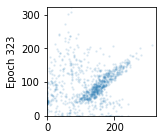

Reconstruction:


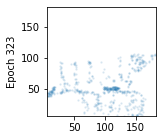

Epoch 324 elbo -7.6224213


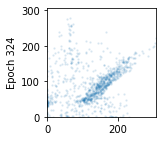

Reconstruction:


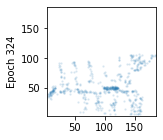

Epoch 325 elbo -7.3991213


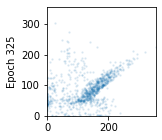

Reconstruction:


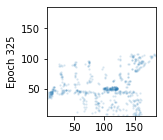

Epoch 326 elbo -7.5116463


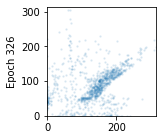

Reconstruction:


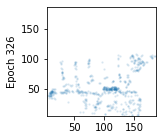

Epoch 327 elbo -7.559422


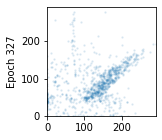

Reconstruction:


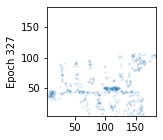

Epoch 328 elbo -7.6648064


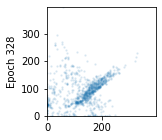

Reconstruction:


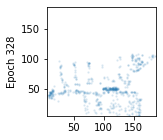

Epoch 329 elbo -7.570144


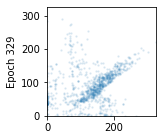

Reconstruction:


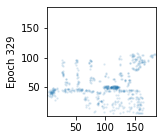

Epoch 330 elbo -7.5652165


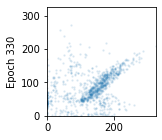

Reconstruction:


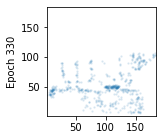

Epoch 331 elbo -7.4941893


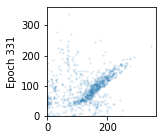

Reconstruction:


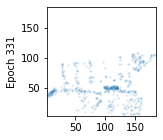

Epoch 332 elbo -7.918729


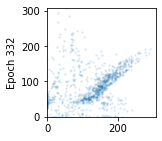

Reconstruction:


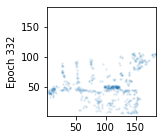

Epoch 333 elbo -7.4918156


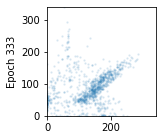

Reconstruction:


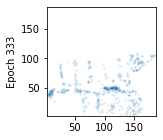

Epoch 334 elbo -7.578262


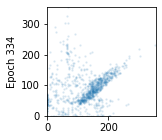

Reconstruction:


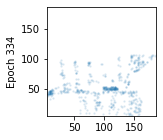

Epoch 335 elbo -7.539149


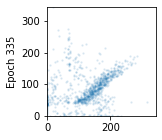

Reconstruction:


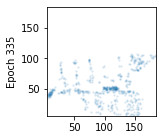

Epoch 336 elbo -7.484812


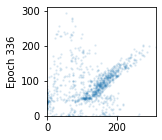

Reconstruction:


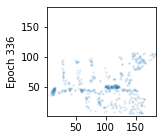

Epoch 337 elbo -7.5376205


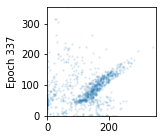

Reconstruction:


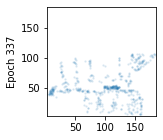

Epoch 338 elbo -7.569085


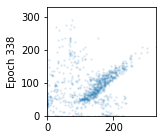

Reconstruction:


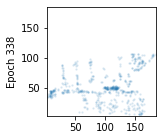

Epoch 339 elbo -7.4516506


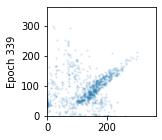

Reconstruction:


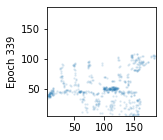

Epoch 340 elbo -7.4857235


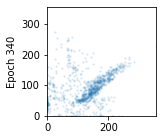

Reconstruction:


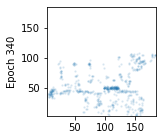

Epoch 341 elbo -7.6179857


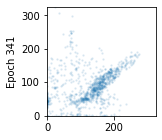

Reconstruction:


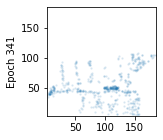

Epoch 342 elbo -7.3054557


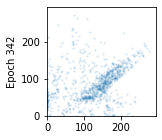

Reconstruction:


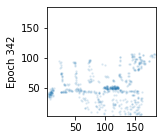

Epoch 343 elbo -7.4018946


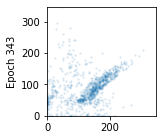

Reconstruction:


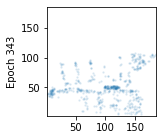

Epoch 344 elbo -7.335646


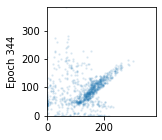

Reconstruction:


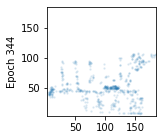

Epoch 345 elbo -7.3742857


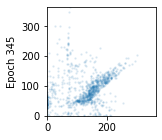

Reconstruction:


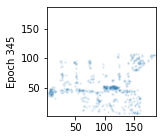

Epoch 346 elbo -7.467049


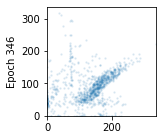

Reconstruction:


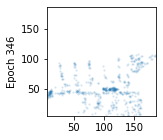

Epoch 347 elbo -7.3451676


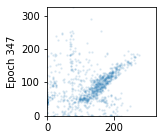

Reconstruction:


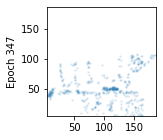

Epoch 348 elbo -7.6027784


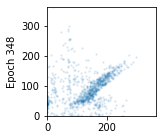

Reconstruction:


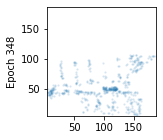

Epoch 349 elbo -7.516878


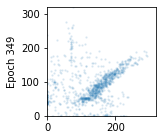

Reconstruction:


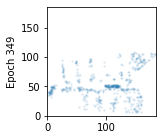

Epoch 350 elbo -7.567448


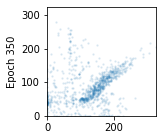

Reconstruction:


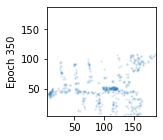

Epoch 351 elbo -7.8191066


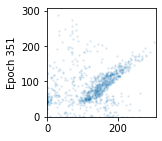

Reconstruction:


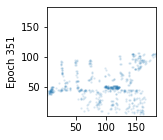

Epoch 352 elbo -7.4731007


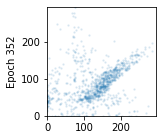

Reconstruction:


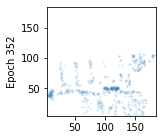

Epoch 353 elbo -7.6376987


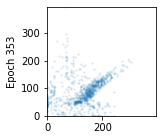

Reconstruction:


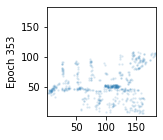

Epoch 354 elbo -7.4305744


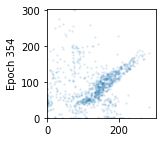

Reconstruction:


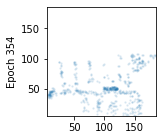

Epoch 355 elbo -7.481699


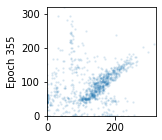

Reconstruction:


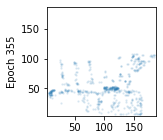

Epoch 356 elbo -7.689126


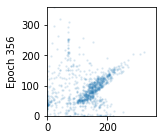

Reconstruction:


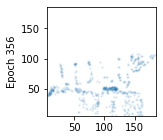

Epoch 357 elbo -7.334886


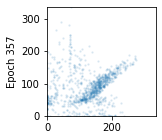

Reconstruction:


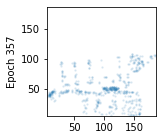

Epoch 358 elbo -7.3877883


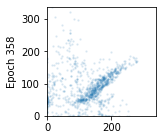

Reconstruction:


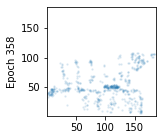

Epoch 359 elbo -7.475207


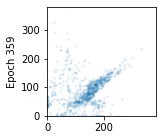

Reconstruction:


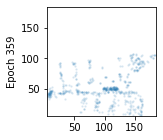

Epoch 360 elbo -8.205322


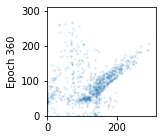

Reconstruction:


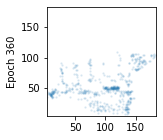

Epoch 361 elbo -7.6470623


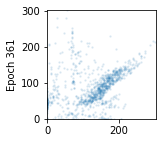

Reconstruction:


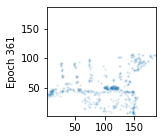

Epoch 362 elbo -7.517001


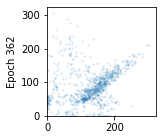

Reconstruction:


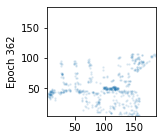

Epoch 363 elbo -7.5348616


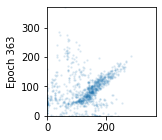

Reconstruction:


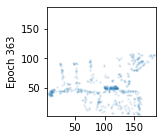

Epoch 364 elbo -7.4135547


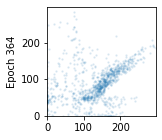

Reconstruction:


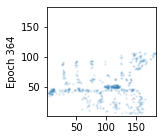

Epoch 365 elbo -7.510679


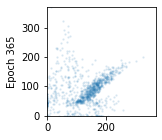

Reconstruction:


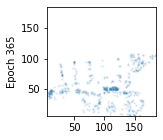

Epoch 366 elbo -7.517329


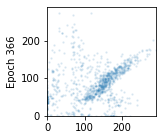

Reconstruction:


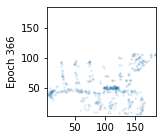

Epoch 367 elbo -7.459367


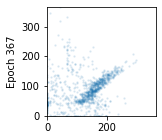

Reconstruction:


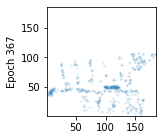

Epoch 368 elbo -7.699279


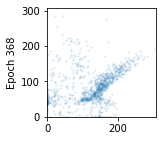

Reconstruction:


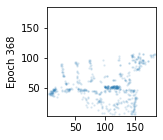

Epoch 369 elbo -7.3661456


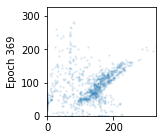

Reconstruction:


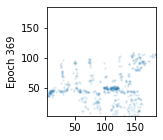

Epoch 370 elbo -7.4657063


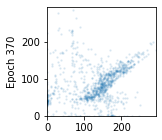

Reconstruction:


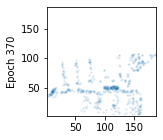

Epoch 371 elbo -8.071493


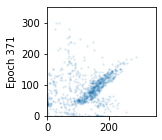

Reconstruction:


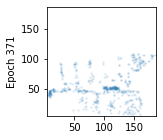

Epoch 372 elbo -7.403273


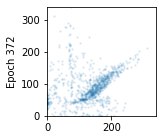

Reconstruction:


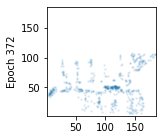

Epoch 373 elbo -7.4013786


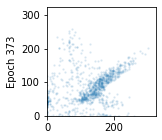

Reconstruction:


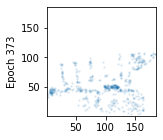

Epoch 374 elbo -7.484329


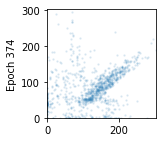

Reconstruction:


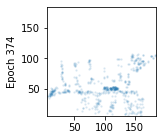

Epoch 375 elbo -7.435479


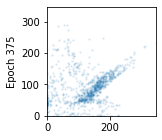

Reconstruction:


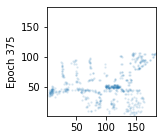

Epoch 376 elbo -7.5500865


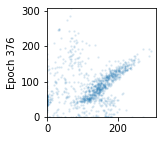

Reconstruction:


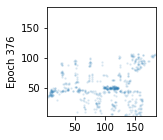

Epoch 377 elbo -7.6775556


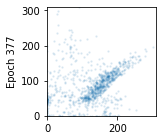

Reconstruction:


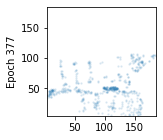

Epoch 378 elbo -7.449532


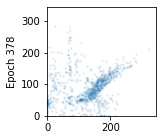

Reconstruction:


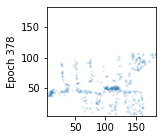

Epoch 379 elbo -7.5645795


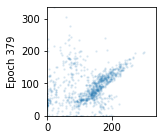

Reconstruction:


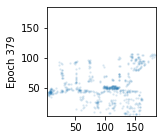

Epoch 380 elbo -7.66764


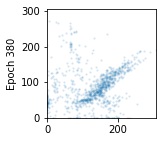

Reconstruction:


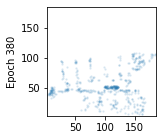

Epoch 381 elbo -7.4403696


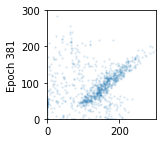

Reconstruction:


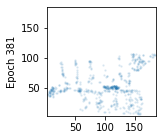

Epoch 382 elbo -7.6459618


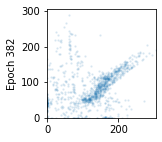

Reconstruction:


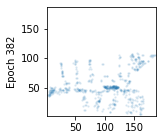

Epoch 383 elbo -7.5268955


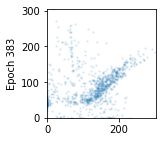

Reconstruction:


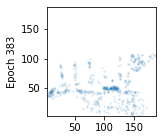

Epoch 384 elbo -7.4252276


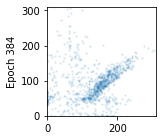

Reconstruction:


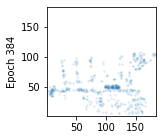

Epoch 385 elbo -7.470773


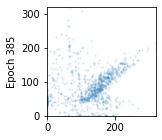

Reconstruction:


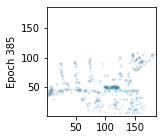

Epoch 386 elbo -7.459686


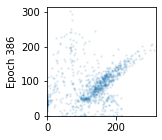

Reconstruction:


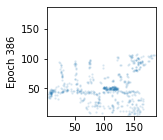

Epoch 387 elbo -7.3007293


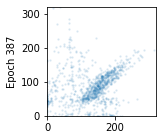

Reconstruction:


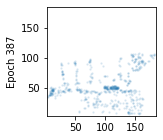

Epoch 388 elbo -7.359072


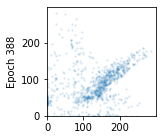

Reconstruction:


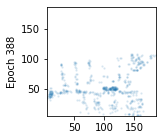

Epoch 389 elbo -7.7495046


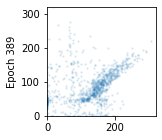

Reconstruction:


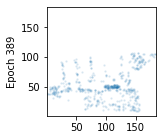

Epoch 390 elbo -7.586305


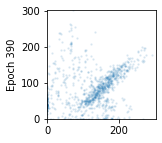

Reconstruction:


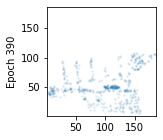

Epoch 391 elbo -7.5222216


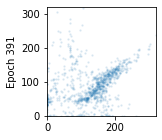

Reconstruction:


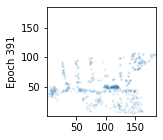

Epoch 392 elbo -7.5268817


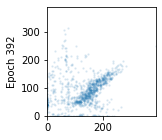

Reconstruction:


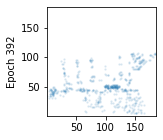

Epoch 393 elbo -7.533424


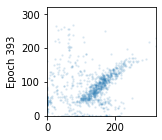

Reconstruction:


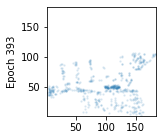

Epoch 394 elbo -7.5096087


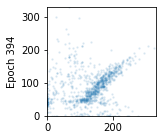

Reconstruction:


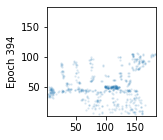

Epoch 395 elbo -7.3379817


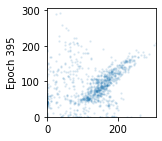

Reconstruction:


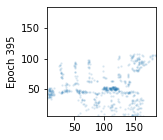

Epoch 396 elbo -7.379822


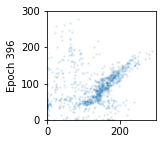

Reconstruction:


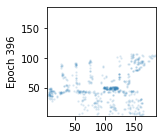

Epoch 397 elbo -7.5697193


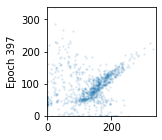

Reconstruction:


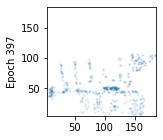

Epoch 398 elbo -7.9222956


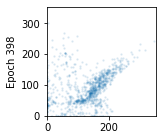

Reconstruction:


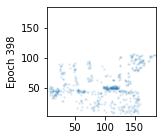

Epoch 399 elbo -7.7383633


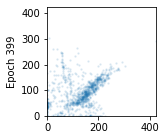

Reconstruction:


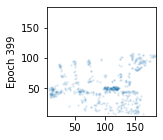

Epoch 400 elbo -7.8327246


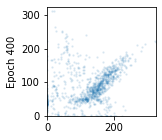

Reconstruction:


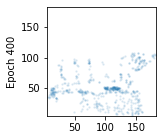

Epoch 401 elbo -7.5949235


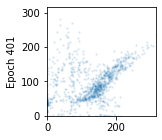

Reconstruction:


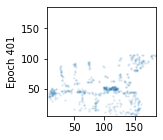

Epoch 402 elbo -7.6227684


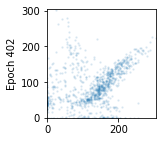

Reconstruction:


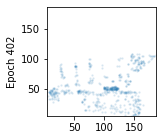

Epoch 403 elbo -7.584178


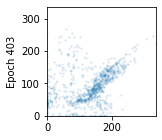

Reconstruction:


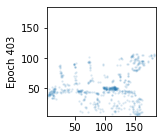

Epoch 404 elbo -7.622145


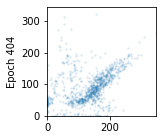

Reconstruction:


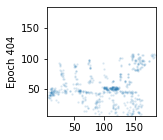

Epoch 405 elbo -7.7315965


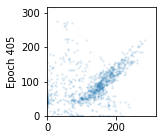

Reconstruction:


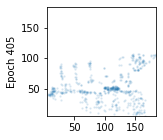

Epoch 406 elbo -7.535702


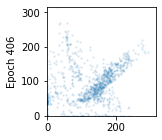

Reconstruction:


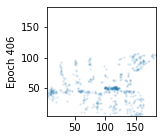

Epoch 407 elbo -7.529261


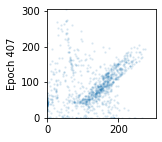

Reconstruction:


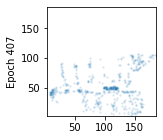

Epoch 408 elbo -7.4947414


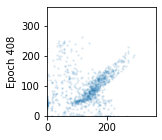

Reconstruction:


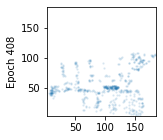

KeyboardInterrupt: 

In [6]:
samples, _ = make_decoder(prior.sample(1000), [2])
s1_5k, _ = make_decoder(prior.sample(1500), [2])
s2k, _ = make_decoder(prior.sample(2000), [2])
s3k, _ = make_decoder(prior.sample(3000), [2])
s5k, _ = make_decoder(prior.sample(5000), [2])
s10k, _ = make_decoder(prior.sample(10000), [2])

t1_5k = None
t2k = None
t3k = None
t5k = None
t10k = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5000):
        test_elbo, test_codes, test_samples, test_loc, t1_5k, t2k, t3k, t5k, t10k = sess.run([elbo, code, samples, loc, s1_5k, s2k, s3k, s5k, s10k], {data: X_test})
        print('Epoch', epoch, 'elbo', test_elbo)
        plot(epoch, test_samples, size=2)
        print('Reconstruction:')
        plot(epoch, test_loc, size=2)
        for _ in range(600):
            indices = np.random.choice(X_train.shape[0], 128)
            batch = X_train[indices]
            sess.run(optimize, {data: batch})